# Model a thermostatic response with a characteristic time constant

Example python implementation of what happens to the temperature of a room with time constant/thermal resistivity tau when a heater that has a temperature of 1 when on and ambient temperature of 0 when off.


In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def respond(action, current_temp, tau):
    """ This is how the room responds to an action of turning on a heater.
    Will decay to 0 if heater left off, will asymtotically approach 'action'
    if action is continually repeated.
    """
    return action + (current_temp - action) * math.exp(-1.0/tau)


# Show results of turning heater on/off for a while

In [31]:
## Series of actions to take
sAction = pd.Series(np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]))

## Initialize response
sResponse = np.zeros(sAction.size)

## loop over sAction, populating sResponse
for i in range(sAction.size):
    ## Get last response
    if i == 0:
        last_response = 0
    else:
        last_response = sResponse[i - 1]
        
    ## Compute response using above defined function
    sResponse[i] = respond(sAction[i], last_response, 3.0)
    
# print(sResponse)

# Plot the response

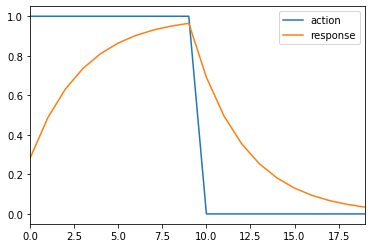

In [30]:
df = pd.DataFrame(list(zip(sAction, sResponse)), columns=['action', 'response'])
df.plot()